In [1]:
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib as mpl
import matplotlib.pyplot as plt
import gym
import math
from matplotlib import rc
import sys
from contextlib import closing
from io import StringIO
from gym import utils
from gym.envs.toy_text import discrete
from gym.envs.registration import register
import time
from IPython.display import clear_output
from scipy.signal import savgol_filter
from Agent import Agent
import utils
from utils import *
import time
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [84]:
env = gym.make('FrozenLake-v0', map_name='8x8')

## Q-Learning

In [125]:
# set environment for Q-learning
env.reset()
env.render()
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Action Space Discrete(4)
State Space Discrete(64)


In [126]:
# train 6000 episodes to estimate Q-function
total_episodes = 6000
total_test_episodes = 10
agent = Agent(env.observation_space.n, env.action_space.n, gamma=1.0, learning_rate=0.1)

In [127]:
# training
untrained_frames = []

for episode in range(total_test_episodes):
    state = env.reset()

    step = 1
    
    while True:
        action = agent.choose_action(state)
        
        new_state, reward, done, info = env.step(action)        
        
        untrained_frames.append({
          'frame': env.render(mode='ansi'),
          'state': state,
          'episode': episode + 1,
          'step': step,
          'reward': reward
        })
        
        if done:
            step = 0
            break
        state = new_state
        step += 1

In [128]:
# training
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Episode: {frame['episode']}")
        print(f"Timestep: {frame['step']}")    
        print(f"State: {frame['state']}")
        print(f"Reward: {frame['reward']}")
        time.sleep(.4)

In [120]:
print_frames(untrained_frames)

  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

Episode: 10
Timestep: 10
State: 27
Reward: 0.0


In [205]:
# training for Q-learning -- record rewards at each episode
def train_qlearning(agent, total_episodes):
    rewards = []
    for episode in range(total_episodes):
        state = env.reset()
        episode_rewards = []
    
        while True:
            
            action = agent.choose_action(state)
        
            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)
        
            agent.learn(state, action, reward, new_state, done, episode)

            state = new_state
        
            episode_rewards.append(reward)
        
            if done == True:
                break
          
        rewards.append(episode_rewards[-1])
        
    return rewards, agent

In [130]:
agent.q_table

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.93384615e-01, 9.96026485e-01, 9.91064228e-01, 1.00000000e+00],
       [9.91705396e-01, 9.93710568e-01, 9.85330658e-01, 1.00000000e+00],
       [9.71260910e-01, 9.83830207e-01, 9.84651979e-01, 1.00000000e+00],
       [7.89266502e-01, 8.12797978e-01, 6.19946608e-01, 1.00000000e+00],
       [9.64912010e-01, 9.06123426e-01, 9.19708585e-01, 1.00000000e+00],
       [9.61426269e-01, 9.65692134e-01, 9.61563305e

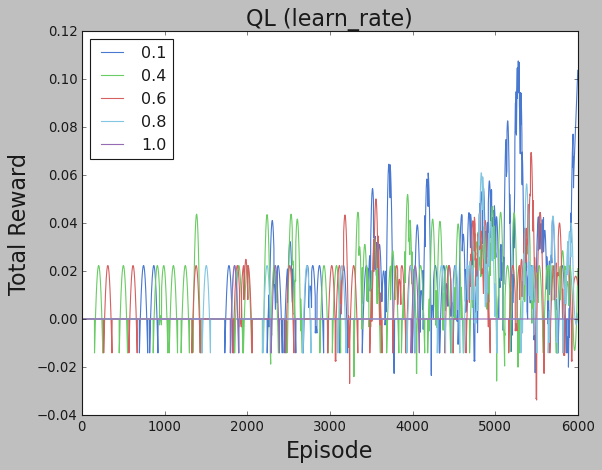

In [207]:
lrs = [0.1, 0.4, 0.6, 0.8, 1.0]
for lr in lrs:
    agent = Agent(env.observation_space.n, env.action_space.n, gamma=1.0, learning_rate=lr)
    rewards, _ = train_qlearning(agent, 6000)
    mpl.style.use('classic')
    plt.plot(savgol_filter(rewards, 101, 2))
    
plt.title("QL (learn_rate)", fontsize=20)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.legend(lrs, loc=2)
plt.savefig('mdp2_11', bbox_inches='tight')

In [215]:
agent = Agent(env.observation_space.n, env.action_space.n, gamma=1.0, learning_rate=0.1)
start = time.time()
total_rewards, trained_agent = train_qlearning(agent, 15000)
print('training time for Q learning of 15000 episodes is {} s'.format(time.time() - start))

training time for Q learning of 6000 episodes is 19.956172227859497 s


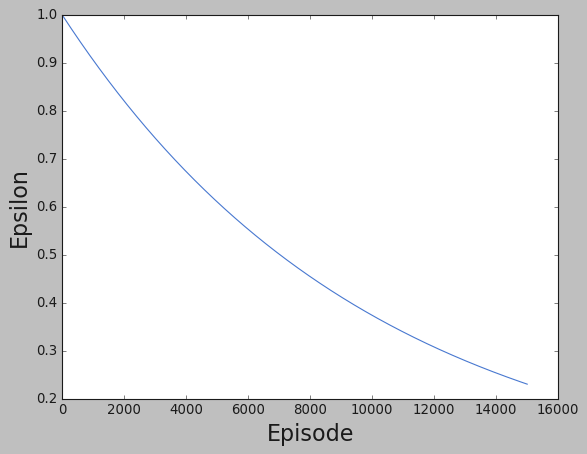

In [216]:
# Define convergence criteria
plt.plot(trained_agent.epsilons_)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon', fontsize=20)

#plt.title("Epsilon for episode (QL)", fontsize=20)

plt.savefig('mdp2_fig10', bbox_inches='tight')

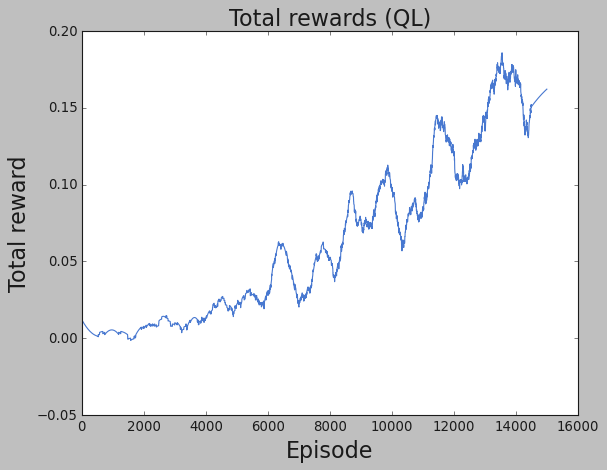

In [217]:
plt.plot(savgol_filter(total_rewards, 1001, 2))
plt.title('Total rewards (QL)', fontsize=20)
plt.ylabel('Total reward', fontsize=20)
plt.xlabel('Episode', fontsize=20)
plt.savefig('mdp2_fig11', bbox_inches='tight')

In [218]:
# test
frames = []

rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    episode_rewards = []

    step = 1
    
    while True:
        action = trained_agent.choose_action(state, explore=False)
        
        new_state, reward, done, info = env.step(action)        
        
        frames.append({
          'frame': env.render(mode='ansi'),
          'state': state,
          'episode': episode + 1,
          'step': step,
          'reward': reward
        })
        
        episode_rewards.append(reward)
        
        if done:
            step = 0
            break
        state = new_state
        step += 1
    
    rewards.append(episode_rewards[-1])

env.close()

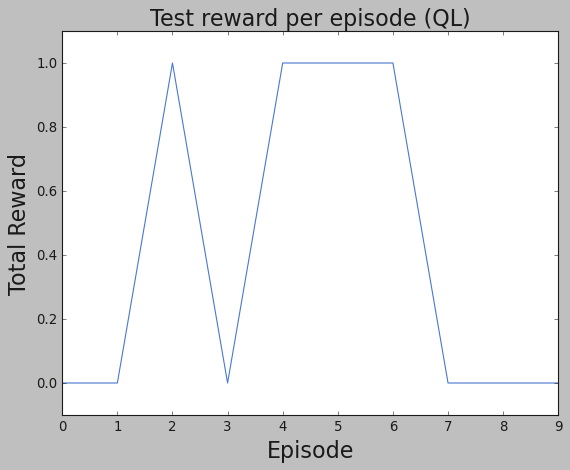

In [221]:
# rewards for 10 tests
plt.plot(rewards)
plt.title("Test reward per episode (QL)", fontsize=20)
#plt.ylim((0, 1))
plt.xlabel('Episode', fontsize=20);
plt.ylabel('Total Reward', fontsize=20)
plt.ylim(-0.1, 1.1)
plt.savefig('mdp2_fig12', bbox_inches='tight')

In [152]:
# reset environment for VI
env = gym.make('FrozenLake-v0', is_slippery=True)
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [154]:
# VI to find best policy
start = time.time()
policy, v, n_iters =value_iteration(env)
print('Number of iterations for value iteration is {}'.format(n_iters))
print('Running time for value iteration is {} s'.format(time.time()-start))

Number of iterations for value iteration is 186
Running time for value iteration is 0.0781850814819336 s


Text(0, 0.5, 'Optimal value')

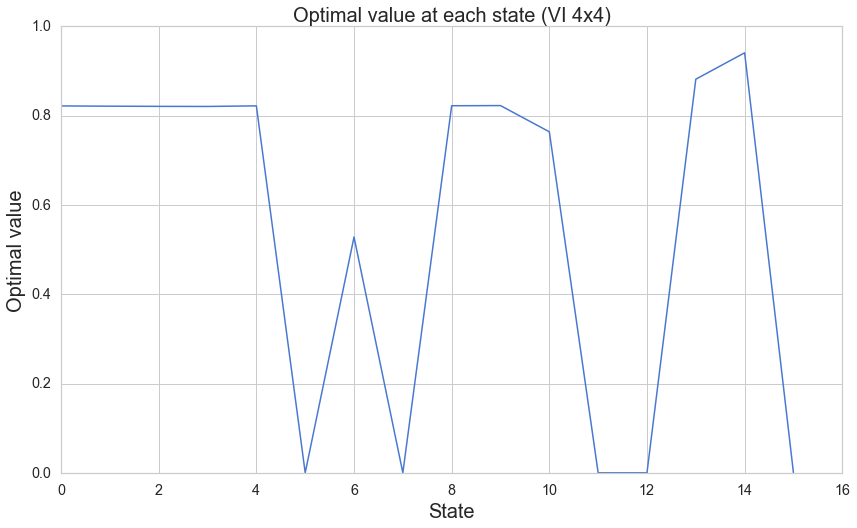

In [155]:
# plot optimal value at each state
plt.plot(v)
plt.title('Optimal value at each state (VI 4x4)', fontsize=20)
plt.xlabel('State', fontsize=20)
plt.ylabel('Optimal value', fontsize=20)

In [156]:
# define best action at each state
policy_ind = [list(x).index(1) for x in policy]

In [58]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [55]:
act_dict = {0: 'LEFT', 1: 'DOWN', 2: 'RIGHT', 3: 'UP'}

print([act_dict[x] for x in policy_ind])

['LEFT', 'UP', 'UP', 'UP', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'UP', 'DOWN', 'LEFT', 'LEFT', 'LEFT', 'RIGHT', 'DOWN', 'LEFT']


Text(0, 0.5, 'Action')

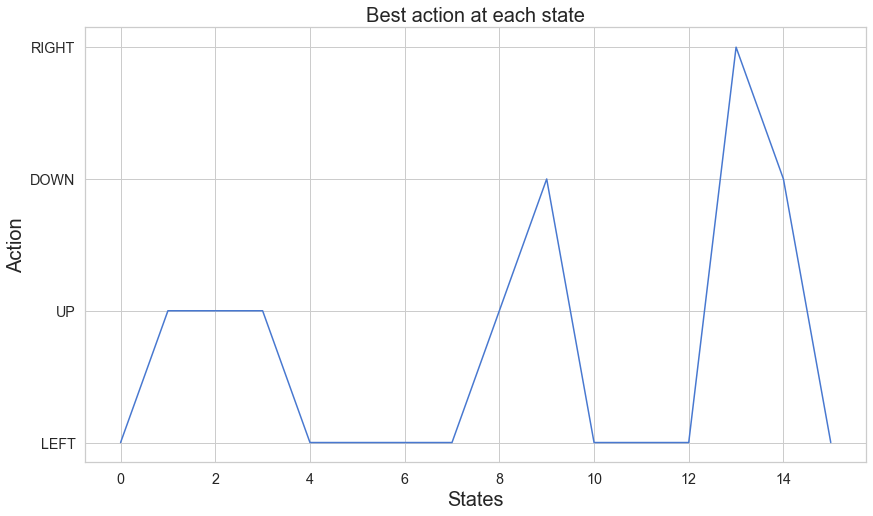

In [56]:
# plot best action at each state
plt.plot([act_dict[x] for x in policy_ind])
plt.title('Best action at each state', fontsize=20)
plt.xlabel('States', fontsize=20)
plt.ylabel('Action', fontsize=20)

In [158]:
# reset environment for PI
env = gym.make('FrozenLake-v0')
env.reset()
env.render()

start = time.time()
policy, v, n_iters= policy_improvement(env)
print('Running time for policy iteration is {} s'.format(time.time() - start))
print('Number of iterations to converge for policy iteration is {}'.format(n_iters))


SFFF
FHFH
FFFH
HFFG
Running time for policy iteration is 0.08602595329284668 s
Number of iterations to converge for policy iteration is 3


Text(0, 0.5, 'Optimal value')

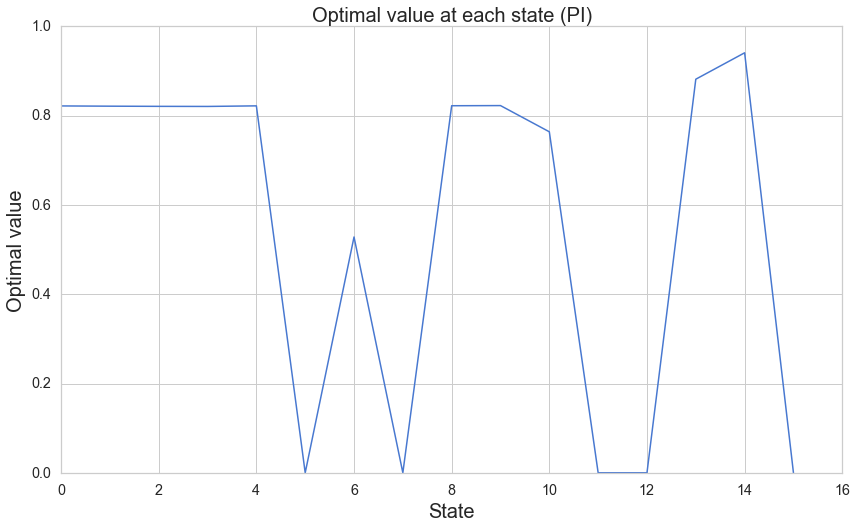

In [159]:
# plot optimal value for each etate
plt.plot(v)
plt.title('Optimal value at each state (PI)', fontsize=20)
plt.xlabel('State', fontsize=20)
plt.ylabel('Optimal value', fontsize=20)

In [64]:
# Best policy
[list(x).index(1) for x in policy]

[0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]

Text(0, 0.5, 'Action')

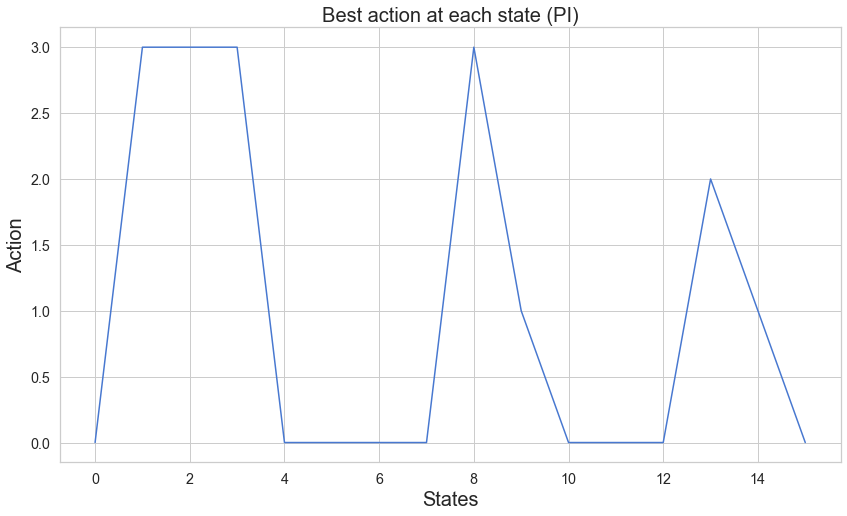

In [61]:
policy_ind = [list(x).index(1) for x in policy]
plt.plot(policy_ind)
plt.title('Best action at each state (PI)', fontsize=20)
plt.xlabel('States', fontsize=20)
plt.ylabel('Action', fontsize=20)

In [162]:
# reset environment for VI 8x8 grid
env = gym.make('FrozenLake-v0', map_name='8x8')
env.reset()
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [163]:
# VI
start = time.time()
policy, v, n_iters = value_iteration(env)
print('Running time for value iteration is {} s'.format(time.time()-start))
print('Number of iterations to converge for value iteration is {}'.format(n_iters))

Running time for value iteration is 0.44769287109375 s
Number of iterations to converge for value iteration is 343


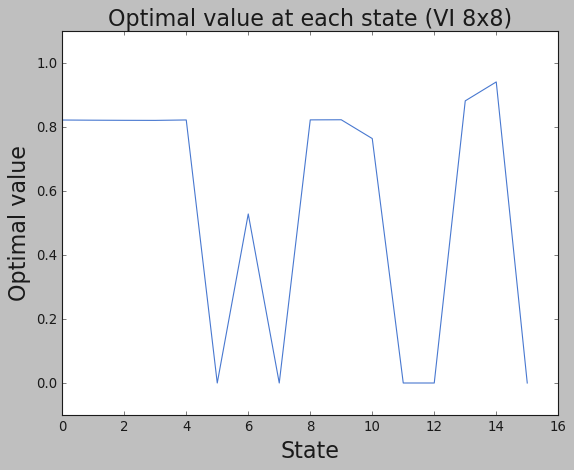

In [161]:
mpl.style.use('classic')
plt.plot(v)
plt.title('Optimal value at each state (VI 8x8)', fontsize=20)
plt.xlabel('State', fontsize=20)
plt.ylabel('Optimal value', fontsize=20)
plt.ylim(-0.1, 1.1)
plt.savefig('mdp2_fig3', bbox_inches='tight')

In [102]:
print([list(x).index(1) for x in policy])

[1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 2, 3, 3, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 3, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0]


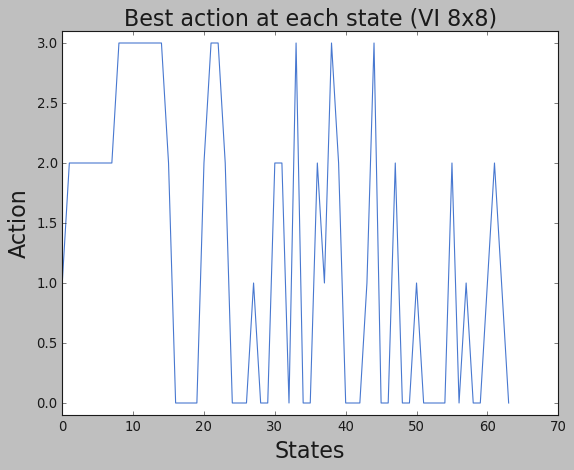

In [107]:
# Best policy for VI 8x8
plt.plot([list(x).index(1) for x in policy])
plt.title('Best action at each state (VI 8x8)', fontsize=20)
plt.xlabel('States', fontsize=20)
plt.ylabel('Action', fontsize=20)
plt.ylim(-0.1, 3.1)
plt.savefig('mdp2_fig4')

In [108]:
n_iters

343

In [164]:
# reset environment for PI 8x8 grid
env = gym.make('FrozenLake-v0', map_name='8x8')
env.reset()
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [165]:
# PI 8x8
start = time.time()
policy, v, n_iters = policy_improvement(env)
print('Running time for policy iteration is {} s'.format(time.time() - start))
print('Number of iterations to converge is {}'.format(n_iters))

Running time for policy iteration is 1.7878029346466064 s
Number of iterations to converge is 7


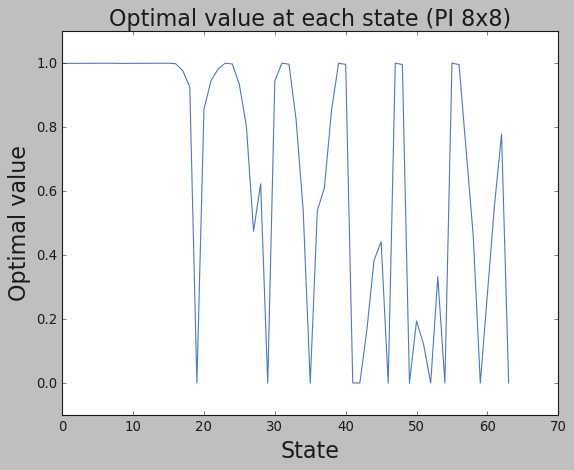

In [113]:
# Optimal value for PI 8x8
plt.plot(v)
plt.title('Optimal value at each state (PI 8x8)', fontsize=20)
plt.xlabel('State', fontsize=20)
plt.ylabel('Optimal value', fontsize=20)
plt.ylim(-0.1, 1.1)
plt.savefig('mdp2_fig5')

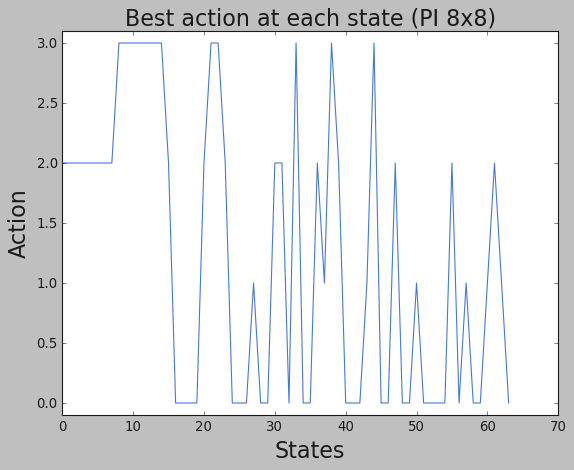

In [115]:
plt.plot([list(x).index(1) for x in policy])
plt.title('Best action at each state (PI 8x8)', fontsize=20)
plt.xlabel('States', fontsize=20)
plt.ylabel('Action', fontsize=20)
plt.ylim(-0.1, 3.1)
plt.savefig('mdp2_fig6')